In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [10]:
d = loadmat(r'dataset\resultados_w1000pts.mat')
# CargaP = pd.DataFrame(d['CargaP'])
# CargaQ = pd.DataFrame(d['CargaQ'])
ptrafo1 = pd.DataFrame(d['Ptrafo1'].transpose().flatten(), columns = ['Ptrafo1'])
ptrafo2 = pd.DataFrame(d['Ptrafo2'].transpose().flatten(), columns = ['Ptrafo2'])


In [11]:
fv = loadmat(r'dataset\FVcurves1000pts.mat')
fv_12 = pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_12'])
fv_18 = pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_18'])
fv_25 = pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_25'])
fv_29 = (1/47) * pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_29'])
fv_32 = (1/42) * pd.DataFrame(fv['FV_w'].flatten(), columns = ['FV_32'])

In [12]:
vref1 = np.zeros([144, 1000])
vref2 = np.zeros([144, 1000])
a = 0
b = 25
for i in range(144):
  for j in range(len(d['Tensao'][0])):
    vref1[i][j] = d['Tensao'][a][j]
    vref2[i][j] = d['Tensao'][b][j]
  a = a + 42
  b = b + 42

vref1 = pd.DataFrame(vref1.transpose().flatten(), columns = ['Vref1'])
vref2 = pd.DataFrame(vref2.transpose().flatten(), columns = ['Vref2'])

In [13]:
X = pd.concat([vref1, ptrafo1, vref2, ptrafo2, fv_12, fv_18, fv_25, fv_29, fv_32], axis=1)
X

,Vref1,Ptrafo1,Vref2,Ptrafo2,FV_12,FV_18,FV_25,FV_29,FV_32
0,1.05,0.334064,1.048146,0.094185,0.0,0.0,0.0,0.0,0.0
1,1.05,0.294347,1.048350,0.080567,0.0,0.0,0.0,0.0,0.0
2,1.05,0.290302,1.048351,0.081519,0.0,0.0,0.0,0.0,0.0
3,1.05,0.278100,1.048401,0.076426,0.0,0.0,0.0,0.0,0.0
4,1.05,0.273466,1.048478,0.077728,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
143995,1.05,0.857367,1.045130,0.235687,0.0,0.0,0.0,0.0,0.0
143996,1.05,0.740003,1.045792,0.201916,0.0,0.0,0.0,0.0,0.0
143997,1.05,0.802869,1.045448,0.220284,0.0,0.0,0.0,0.0,0.0
143998,1.05,0.549499,1.046886,0.155256,0.0,0.0,0.0,0.0,0.0


In [14]:
tensao = np.zeros([42, 1000, 144])
t = d['Tensao'].transpose()

for i in range(42):
  for j in range(1000):
    a = i
    for k in range(144):
      tensao[i][j][k] = t[j][a]
      a = a + 42

tensao = pd.DataFrame(tensao.reshape(42,144000).transpose())
Y = tensao.drop([0,25], axis=1)
Y


,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
0,1.049757,1.048631,1.047954,1.047288,1.045633,1.045323,1.044892,1.044343,1.043831,1.043756,...,1.046444,1.046409,1.045458,1.045226,1.044184,1.043436,1.043109,1.042728,1.042645,1.042620
1,1.049787,1.048799,1.048210,1.047630,1.046192,1.045918,1.045536,1.045047,1.044593,1.044526,...,1.046862,1.046830,1.046044,1.045847,1.044970,1.044340,1.044068,1.043747,1.043675,1.043653
2,1.049789,1.048806,1.048221,1.047647,1.046217,1.045953,1.045586,1.045105,1.044658,1.044593,...,1.046855,1.046824,1.046065,1.045863,1.044958,1.044309,1.044029,1.043714,1.043644,1.043622
3,1.049798,1.048857,1.048305,1.047759,1.046404,1.046148,1.045795,1.045338,1.044917,1.044855,...,1.047025,1.046993,1.046262,1.046073,1.045230,1.044623,1.044362,1.044061,1.043997,1.043977
4,1.049802,1.048878,1.048324,1.047778,1.046423,1.046169,1.045812,1.045352,1.044924,1.044860,...,1.047047,1.047017,1.046280,1.046090,1.045245,1.044637,1.044375,1.044064,1.043994,1.043973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143995,1.049380,1.046493,1.044786,1.043096,1.038897,1.038091,1.036963,1.035509,1.034161,1.033960,...,1.040947,1.040853,1.038462,1.037885,1.035321,1.033494,1.032695,1.031740,1.031518,1.031450
143996,1.049464,1.046952,1.045459,1.043993,1.040356,1.039656,1.038691,1.037464,1.036318,1.036148,...,1.042061,1.041979,1.039981,1.039483,1.037257,1.035658,1.034962,1.034147,1.033968,1.033914
143997,1.049418,1.046700,1.045085,1.043486,1.039506,1.038744,1.037694,1.036361,1.035128,1.034946,...,1.041565,1.041480,1.039095,1.038548,1.036102,1.034345,1.033582,1.032695,1.032506,1.032446
143998,1.049599,1.047733,1.046619,1.045518,1.042773,1.042266,1.041571,1.040676,1.039849,1.039726,...,1.044188,1.044133,1.042481,1.042093,1.040354,1.039097,1.038544,1.037923,1.037782,1.037741


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(100800, 9)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40))

model.compile(optimizer='adam',loss='mae')

### Training

In [22]:
history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=50)

Epoch 1/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 2/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0012 - val_loss: 9.8423e-04
Epoch 3/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 4/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 5/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0012 - val_loss: 7.6753e-04
Epoch 6/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0011 - val_loss: 9.7290e-04
Epoch 7/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0012 - val_loss: 7.6963e-04
Epoch 8/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 9/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/50
788/788 [==============================] - 1s 1ms/step - loss: 0.0011 - 

In [23]:
mae = model.evaluate(X_test, y_test, verbose=0)
print('>%.3f' % mae)

>0.001


### Losses

<AxesSubplot:>

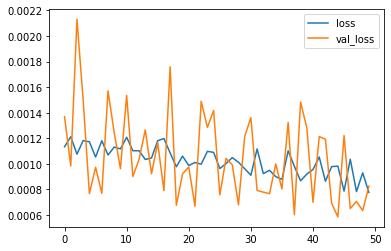

In [24]:
losses = pd.DataFrame(history.history)
losses.plot()

### Evaluation on Test Data

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
X_test

array([[0.        , 0.01151375, 0.96481405, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0636456 , 0.93383147, ..., 0.56827728, 0.56827728,
        0.56827728],
       [0.        , 0.03259303, 0.97554075, ..., 0.90024084, 0.90024084,
        0.90024084],
       ...,
       [0.        , 0.63109924, 0.38714888, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07471059, 0.93812609, ..., 0.92575206, 0.92575206,
        0.92575206],
       [0.        , 0.00561003, 0.9707056 , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
predictions = history.model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,predictions)}")
predictions

Mean Absolute Error: 0.0008257513032069022
